In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_json('combined.json', lines=True)
data.head()
len(data)
#data.contents

data.contents[1]

'  WASHINGTON – North Carolina’s Waccamaw River watershed will benefit from a $1 million restitution order from a federal court, funding environmental projects to acquire and preserve wetlands in an area damaged by illegal releases of wastewater from a corporate hog farm, announced Ignacia S. Moreno, Assistant Attorney General of the Justice Department’s Environment and Natural Resources Division; U.S. Attorney for the Eastern District of North Carolina Thomas G. Walker; Director Greg McLeod from the North Carolina State Bureau of Investigation; and Camilla M. Herlevich, Executive Director of the North Carolina Coastal Land Trust.   Freedman Farms Inc. was sentenced in February 2012 to five years of probation and ordered to pay $1.5 million in fines, restitution and community service payments for violating the Clean Water Act when it discharged hog waste into a stream that leads to the Waccamaw River.\xa0 William B. Freedman, president of Freedman Farms, was sentenced to six months in 

In [3]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
ps = PorterStemmer() 
   
#print(data.contents[1]) 
for i in range(len(data.contents)):
   # data.contents[i]=ps.stem(data.contents[i])   
    data.contents[i]=ps.stem(data.contents[i])
   # print(data.contents[i]) 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
tfidf = TfidfVectorizer(min_df = 4,max_df = 0.93,max_features = 8000,stop_words = 'english')
tfidf.fit(data.contents)
text = tfidf.transform(data.contents)

from sklearn.preprocessing import normalize
text=normalize(text)
#print(text)
aa=text.toarray()
#print(data.contents.shape())

#print(tfidf.get_feature_names())

In [5]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

tfidf.fit(data.contents)
text = tfidf.transform(data.contents)

from sklearn.preprocessing import normalize
text=normalize(text)
aa=text.toarray()
#print(data.contents.shape())
#print(data)
#print(tfidf.get_feature_names())

Fit 2 clusters
[12143.151374379051]
Fit 4 clusters
[12143.151374379051, 11793.556972150694]
Fit 6 clusters
[12143.151374379051, 11793.556972150694, 11658.505614554399]
Fit 8 clusters
[12143.151374379051, 11793.556972150694, 11658.505614554399, 11592.749530310224]
Fit 10 clusters
[12143.151374379051, 11793.556972150694, 11658.505614554399, 11592.749530310224, 11447.369985909083]
Fit 12 clusters
[12143.151374379051, 11793.556972150694, 11658.505614554399, 11592.749530310224, 11447.369985909083, 11272.504044983303]
Fit 14 clusters
[12143.151374379051, 11793.556972150694, 11658.505614554399, 11592.749530310224, 11447.369985909083, 11272.504044983303, 11114.536836867117]
Fit 16 clusters
[12143.151374379051, 11793.556972150694, 11658.505614554399, 11592.749530310224, 11447.369985909083, 11272.504044983303, 11114.536836867117, 11100.02829587896]
Fit 18 clusters
[12143.151374379051, 11793.556972150694, 11658.505614554399, 11592.749530310224, 11447.369985909083, 11272.504044983303, 11114.536836

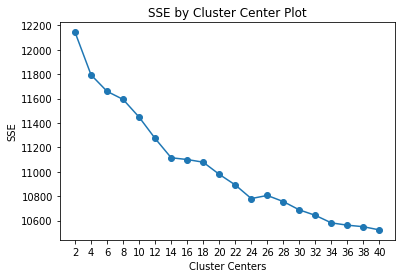

In [6]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        print(sse)
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 40)

In [7]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
print(clusters)


[1 9 9 ... 1 1 1]


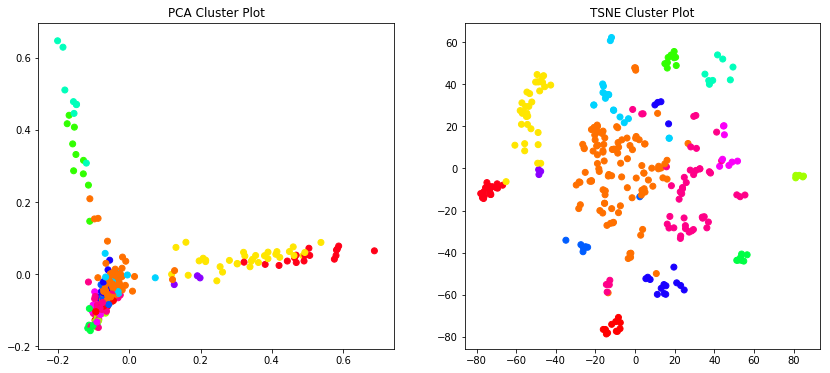

In [8]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [9]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 5)


Cluster 0
project,exploitation,childhood,pornography,child

Cluster 1
indictment,department,criminal,district,attorney

Cluster 2
false,income,returns,irs,tax

Cluster 3
immigration,ina,employment,discrimination,osc

Cluster 4
settlement,medicare,claims,care,health

Cluster 5
disabilities,hud,discrimination,fair,housing

Cluster 6
care,hhs,fraud,health,medicare

Cluster 7
bid,auctions,fraud,financial,antitrust

Cluster 8
aka,murder,racketeering,members,gang

Cluster 9
air,water,environmental,epa,settlement

Cluster 10
account,tax,swiss,bank,accounts

Cluster 11
election,rights,disabilities,voting,ada

Cluster 12
attorney,justice,department,civil,rights

Cluster 13
injunction,complaint,customers,returns,tax


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustecr = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')

model=clustecr.fit_predict(aa)
print("bb")
print(clustecr.labels_.size)
print(clustecr.labels_)


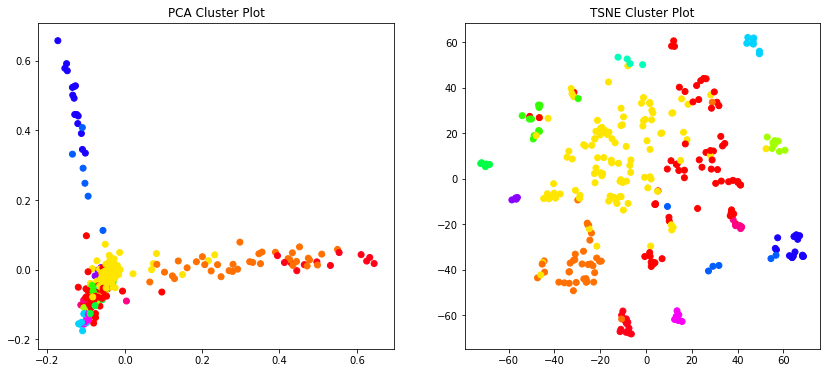

In [11]:
plot_tsne_pca(text, clustecr.labels_)

In [12]:
get_top_keywords(text, clustecr.labels_, tfidf.get_feature_names(), 5)


Cluster 0
justice,attorney,civil,department,rights

Cluster 1
false,income,returns,irs,tax

Cluster 2
indictment,fraud,district,criminal,attorney

Cluster 3
project,exploitation,childhood,pornography,child

Cluster 4
air,oil,water,environmental,epa

Cluster 5
observers,voters,rights,election,voting

Cluster 6
murder,abt,racketeering,members,gang

Cluster 7
disabilities,hud,discrimination,fair,housing

Cluster 8
false,medicare,claims,care,health

Cluster 9
hhs,care,fraud,health,medicare

Cluster 10
bid,real,estate,foreclosure,auctions

Cluster 11
immigration,ina,employment,discrimination,osc

Cluster 12
agreement,514,access,disabilities,ada

Cluster 13
injunction,complaint,customers,returns,tax


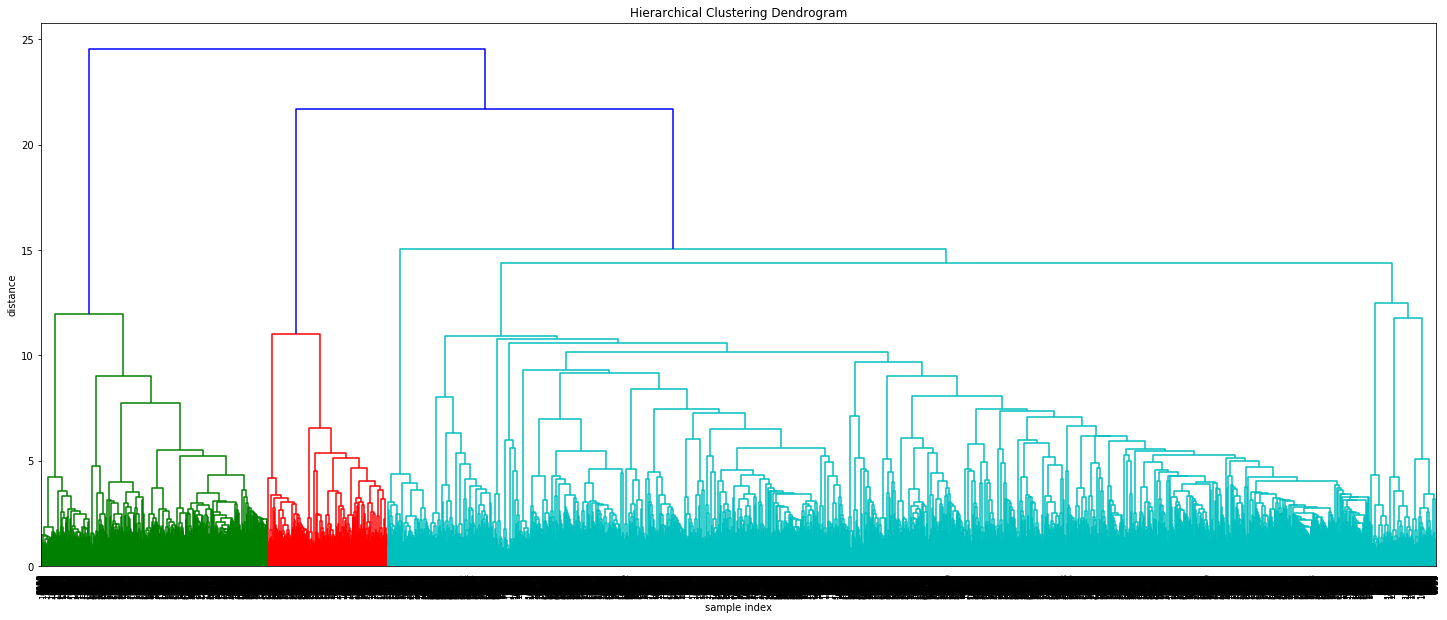

xc


In [13]:
from sklearn.cluster import AgglomerativeClustering 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np 
  
Z=linkage(aa,'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    p=14,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
print("xc")

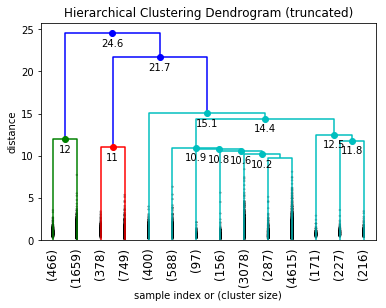

In [14]:

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=14,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()